In [4]:
import sys
sys.path.append('../../alg')
import distance_buffer as db
import math

from shapely.geometry import Polygon
from shapely.geometry import LinearRing
from shapely.geometry import LineString
from shapely.geometry import Point

import numpy as np

from scipy.spatial.distance import euclidean

from math import sqrt
from math import floor
from matplotlib import pyplot
from matplotlib.patches import Circle
from descartes.patch import PolygonPatch

In [5]:
from shapely.geometry import MultiPolygon

In [15]:
reload(db)

<module 'distance_buffer' from '../../alg/distance_buffer.py'>

In [7]:
def poly_loop(poly, r):
    candpts = []
    candpts.append(db.find_cand_points_list_ref(list(poly.exterior.coords),10.0))
    for i in range(0, len(poly.interiors)):
        candpts.append(db.find_cand_points_list_ref(list(poly.interiors[i].coords),10.0))
    
    return candpts
        
    # and process exterior

In [8]:
def buffer_loop(buffers, r):
    candpts = []
    for i in range(0, len(buffers)):
        if isinstance(buffers[i], Polygon):
            print "poly"
            candpts.append(poly_loop(buffers[i], r))
        elif isinstance(buffers[i], MultiPolygon):
            print "multi"
            for j in range(0, len(buffers[i])):
                candpts.append(poly_loop(buffers[i].geoms[j], r))
    return candpts
        

In [9]:
def plot_fig():
    fig = pyplot.figure(1, figsize=(20,20), dpi=90)
    ax = fig.add_subplot(222)
    ax.axis('equal')
    db.plot_coords(ax, targetArea.interiors[0])
    db.plot_coords(ax, targetArea.exterior)
    patch = PolygonPatch(targetArea, facecolor='yellow', edgecolor='#6699cc', alpha=0.1, zorder=2)
    ax.add_patch(patch)
    return ax, fig


In [21]:

## distance fig



#targetArea = Polygon([(0,0),(0,400),(400,400),(400,0)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
targetArea = Polygon([(0,150),(250,200),(150,250),(300,350),(400,375),(400,50),(350,0),(100,10),(25,25)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
#targetArea = Polygon([(0,150),(50,300),(30,400),(250,250),(350,100),(385,400),(200,10),(50,50)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])

print targetArea.area



## buffer fig
buffers = db.gen_dist_buffers(10.0, targetArea, 16)



#db.plot_coords_list(ax, pts_buffer1, color="#000000", zorder=3)

92278.0
62827.4044999
38473.6900981
20613.8459792
9007.31435043
1645.09925768
0.0


In [22]:
ipts = []
ipts.append(db.gen_initial_candpt(10.0, (0,150), 60.0))
for i in range(0, len(buffers)*2):
    if i%2 == 0:
        pt = db.gen_initial_candpt(10.0, ipts[i],60.0)
    else:
        pt = db.gen_initial_candpt(10.0, ipts[i],120.0)

    ipts.append(pt)
    print pt

[15.000000000000004, 175.98076211353316]
[7.500000000000007, 188.97114317029974]
[15.000000000000009, 201.96152422706632]
[7.500000000000012, 214.9519052838329]
[15.000000000000014, 227.94228634059948]
[7.500000000000018, 240.93266739736606]
[15.00000000000002, 253.92304845413264]
[7.500000000000023, 266.9134295108992]
[15.000000000000025, 279.9038105676658]
[7.500000000000028, 292.8941916244324]
[15.00000000000003, 305.88457268119896]
[7.500000000000034, 318.87495373796554]


In [23]:
candpts = buffer_loop(buffers, 10.0)

poly
LINE EQ: 
y = 0.2*x + 150.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0679366220487 -0.0679366220487
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0728884147321 -0.0728884147321
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0786188155668 -0.0786188155668
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0853271337587 -0.0853271337587
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0932870503848 -0.0932870503848
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.102884877099 -0.102884877099
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.114684140833 -0.114684140833
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRC

0.272974152459 -0.272974152459
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.375466915492 -0.375466915492
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.601196197297 -0.601196197297
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.50749865779 -1.50749865779
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.25*x + 259.538353904
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0746139598961 -0.340899232167
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.230313419318 -0.230313419318
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.299230134836 -0.299230134836
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.427002001242 -0.427002001242
ENTE

1.14937608933 -1.14937608933
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 2.47568849202*x + -82.3816571525
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.54865624825 -22.2380451595
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 3.39001570171*x + -148.97728519
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.553403305437 -23.0387107352
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
26.6548180888 -26.6548180888
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 5.20503127619*x + -280.427958461
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
11.459379394 -12.3483706309
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 10.7484613725*x + -680.383507642
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERI

no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -15.2879521273*x + 4481.04121085
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
3.16694114083 -8.43271857163
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -6.02260683753*x + 1888.57825155
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.19228258092 -9.32368213871
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -3.70296710794*x + 1240.66873963
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.2148524209 -10.1318861231
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.63287240184*x + 942.60565508
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.220922271599 -10.8260369832
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT 

no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 2.90461259418*x + -664.220064903
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
3.35974020003 -4.40111617553
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 4.22615940183*x + -1051.72805017
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.36742836394 -5.38357618694
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 7.467251417*x + -2005.42180671
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.37892780854 -6.33034092673
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 29.4837033082*x + -8496.82203379
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.385080693425 -7.21321549135
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT 

ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.135734263594 -0.0220427793145
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.134408035329 -0.134408035329
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.155278746586 -0.155278746586
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.183822469198 -0.183822469198
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.225223633659 -0.225223633659
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.290695023032 -0.290695023032
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.409830795598 -0.409830795598
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.694429313731 -0.694429313731
ENTERIN

num of buffers 1


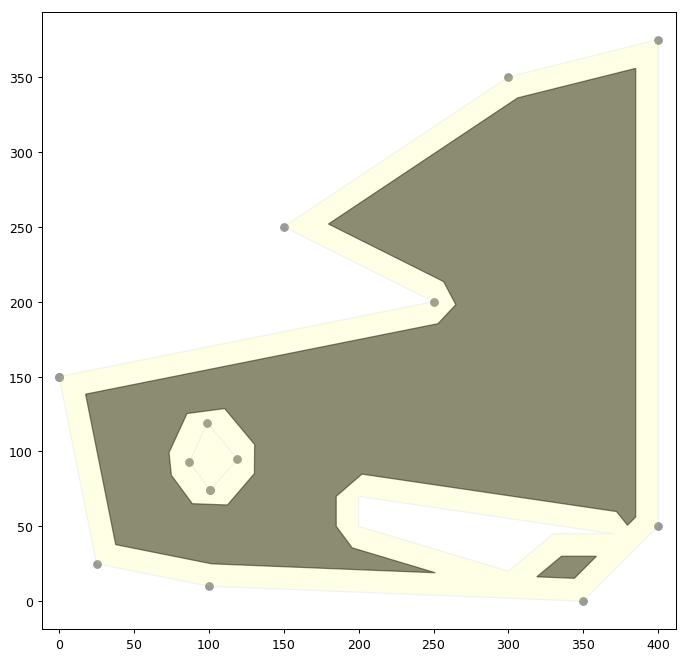

In [668]:
tt=[]
tt.append(targetArea)
tt.append( targetArea.buffer(-1.5*10, 1))
ax, fig = plot_fig()
db.plot_dist_buffers(ax, tt)
pyplot.show()

In [622]:
db.plot_coords_list(ax, ipts, color="#000000", zorder="3" )

In [685]:
for i in range(0,len(candpts)):
    #print list(candpts[i])
    for j in range(0, len(candpts[i])):
        db.plot_coords_list(ax, candpts[i][j], color="#000000", zorder="3" )
        db.plot_radii(ax, candpts[i][j], 10.0, color="#999999", zorder=4, alpha=0.3)
        #print "\t"+str(len(candpts[i][j]))
        #for k in range(0, len(candpts[i][j])):
            
            
            #print "\t\t"+str(len(candpts[i][j][k]))
            #print list(candpts[i][j][k])


IndexError: list index out of range

In [33]:
ax.plot(buffers[0].exterior.coords[0][0], buffers[0].exterior.coords[0][1], 'x')
ax.plot(buffers[1].geoms[0].exterior.coords[0][0], buffers[1].geoms[0].exterior.coords[0][1], 'x') 

In [111]:
ax, fig = plot_fig()
for b in buffers:
    print type(b)
db.plot_dist_buffers(ax, buffers)
#pyplot.show()

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>
num of buffers 5


In [112]:
# get the unit vector
pt2 = np.array(buffers[0].exterior.coords[0])
pt1 = np.array(buffers[0].exterior.coords[1])
v = pt2 - pt1
print buffers[0].exterior.coords[1]
unitv = v/np.linalg.norm(v)
print unitv
# rotate it
sin60 = np.sin(math.radians(60))
cos60 = np.cos(math.radians(60))
sin120 = np.sin(math.radians(120))
cos120 = np.cos(math.radians(120))
rotatev = np.array([(unitv[0]*cos60 - unitv[1]*sin60), (unitv[0]*sin60 + unitv[1]*cos60)])
rotatev120 = np.array([(unitv[0]*cos120 - unitv[1]*sin120), (unitv[0]*sin120 + unitv[1]*cos120)])
print rotatev
rotatev15 = rotatev*sqrt(3)*10
rotatev12015 = rotatev120*sqrt(3)*10
print rotatev15

(250.0, 200.0)
[-0.98058068 -0.19611614]
[-0.32044878 -0.94726584]
[ -5.55033573 -16.40712569]


In [113]:
ax.plot([pt2[0],pt1[0]],[pt2[1],pt1[1]], color='black')
ax.plot([pt1[0],rotatev15[0]+pt1[0]], [pt1[1],rotatev15[1]+pt1[1]], color='green')
ax.plot([pt1[0],rotatev12015[0]+pt1[0]], [pt1[1],rotatev12015[1]+pt1[1]], color='blue')


ax.plot([rotatev15[0]+pt1[0], pt1[0]+(unitv[0]*sqrt(3)*10)], [rotatev15[1]+pt1[1], pt1[1]+(unitv[1]*sqrt(3)*10)], color='pink')

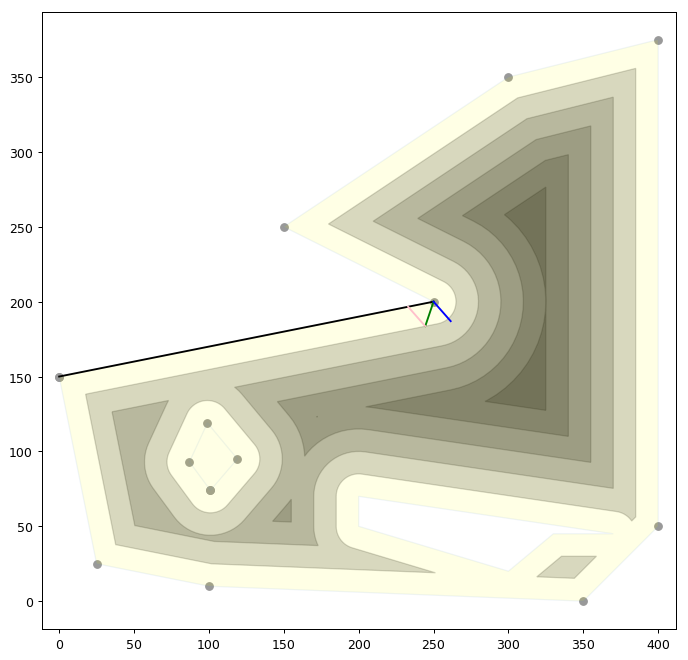

In [114]:
pyplot.show()


In [29]:
print buffers[0].exterior.coords[0]
print buffers[1].geoms[0].exterior.coords[0]

(0.0, 150.0)
(17.650452162436565, 138.23303189170898)


13.6602540378 -10.0
11.1871000912 -8.26827896338


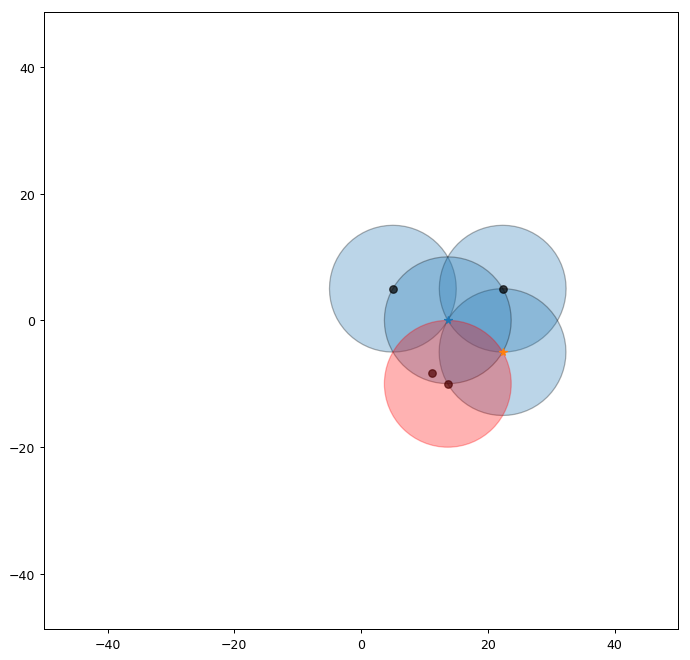

In [766]:
fig2 = pyplot.figure(1, figsize=(20,20), dpi=90)
ax2 = fig2.add_subplot(222)
ax2.axis('equal')
pt1 = (5.0,5.0)
t = (5.0+sqrt(3)*10)
pt2 = (t,5.0)

a1 = 60
a2 = 50

endx = pt2[0]-sqrt(3)*10.0*math.cos(math.radians(a1))
endy = pt2[1]-sqrt(3)*10.0*math.sin(math.radians(a1))
endx1 = pt2[0]-sqrt(3)*10.0*math.cos(math.radians(a2)) #+pt1[0]
endy1 = pt2[1]-sqrt(3)*10.0*math.sin(math.radians(a2)) #+pt1[1]
print endx, endy
print endx1, endy1


c1 = Circle(pt1, 10.0, color="#000000", zorder=2, alpha=0.3)
c2 = Circle(pt2, 10.0, color="#000000", zorder=2, alpha=0.3)
c3 = Circle([endx,endy], 10.0, color="#ff0000", zorder=2, alpha=0.3)
c4 = Circle([endx1,endy1], 10.0, color="#00ff00", zorder=2, alpha=0.3)


ax2.add_patch(PolygonPatch(Point(pt1).buffer(10.0),  alpha=0.3))
ax2.add_patch(PolygonPatch(Point(pt2).buffer(10.0),  alpha=0.3))

#ax2.add_patch(c1)
#ax2.add_patch(c2)
ax2.add_patch(c3)
#ax2.add_patch(c4)
ax2.plot(pt1[0],pt1[1], 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(pt2[0],pt2[1], 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(endx, endy, 'o', color="#000000", zorder=1, alpha=.7)
ax2.plot(endx1, endy1, 'o', color="#000000", zorder=1, alpha=.7)
pt3 = (13.660254037844386, 0.02082622037097895)
anotherpt = (22.296256658592572, -4.9988086042756175)

ax2.plot(pt3[0],pt3[1], '*')
ax2.plot(anotherpt[0],anotherpt[1],'*')
p = Point(pt3).buffer(10.0)
p1 = Point(anotherpt).buffer(10.0)
ax2.add_patch(PolygonPatch(p1, alpha=0.3))
ax2.add_patch(PolygonPatch(p, alpha=0.3))

ax2.set_xlim([-50,50])
ax2.set_ylim([-50,50])

pyplot.show()

In [738]:
#this is the bottom intersection point of the two circles
list(((Point(pt1).buffer(10.0)).exterior).intersection((Point(pt2).buffer(10.0)).exterior)[0].coords)

[(13.660254037844386, 0.02082622037097895)]

In [762]:
list((p.exterior).intersection((Point(pt2).buffer(10.0)).exterior)[1].coords)

[(22.296256658592572, -4.9988086042756175)]

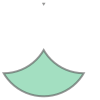

In [724]:
(list((Point(pt1).buffer(10.0)).intersection(Point(pt2).buffer(10.0)).exterior.coords))

[(15.0, 5.0),
 (14.95184726672197, 4.019828596704395),
 (14.807852804032304, 3.0490967798387194),
 (14.56940335732209, 2.097153227455379),
 (14.23879532511287, 1.173165676349106),
 (13.819212643483553, 0.2860326317400279),
 (13.660254037844386, 0.02082622037097895),
 (13.501295432205229, 0.28603263174001015),
 (13.081712750575909, 1.1731656763490887),
 (12.751104718366687, 2.097153227455364),
 (12.512655271656469, 3.049096779838705),
 (12.368660808966803, 4.019828596704383),
 (12.320508075688771, 4.99999999999999),
 (12.368660808966801, 5.980171403295597),
 (12.512655271656465, 6.950903220161275),
 (12.75110471836668, 7.902846772544617),
 (13.081712750575901, 8.826834323650893),
 (13.501295432205218, 9.713967368259972),
 (13.660254037844386, 9.979173779629022),
 (13.81921264348352, 9.713967368260034),
 (14.238795325112841, 8.82683432365096),
 (14.569403357322068, 7.9028467725446925),
 (14.80785280403229, 6.950903220161357),
 (14.95184726672196, 5.980171403295685),
 (15.0, 5.00000000000

In [704]:
print type(Circle)

<type 'type'>
